# Finding the best advertisement banner using bandits

In this section, let's understand how to find the best advertisement banner using the
bandits. Suppose, we are running a website and we have five different banners for a single
advertisement that is been showed on our website and say we want to figure out which
advertisement banner is most liked by the user.

We can frame this problem as a multi-armed bandit problem. The five advertisement
banners represent the five arms of the bandit and we assign +1 reward if the user clicks the
advertisement and 0 reward if the user does not click the advertisement. So, to find out
which advertisement banner is most clicked by the user, that is which advertisement
banner can give us a maximum reward, we can use various exploration strategies. In this
section, let's just use an epsilon-greedy method to understand the best advertisement
banner.

First, let us import the necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Creating a dataset

Now, let's create a dataset. We generate a dataset with five columns denoting the five
advertisement banners and we generate 100000 rows where the values in the row will be
either o or 1 indicating that whether the advertisement banner has been clicked (1) or not
clicked (0) by the user:

In [6]:
df = pd.DataFrame()
for i in range(5):
    df['Banner_type_'+str(i)] = np.random.randint(0,2,100000)

Let's look at the first few rows of our dataset:

In [7]:
df.head()

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,1,0,1,1
1,1,1,1,0,0
2,0,1,1,0,0
3,1,1,1,0,0
4,0,1,0,0,0


As we can observe we have the 5 advertisement banners (0 to 4) and
the rows consist of value 0 or 1 indicating that whether the banner has been clicked (0) or not clicked (1). 

## Initialize the variables

Now, let's initialize some of the important variables:

Set the number of iterations:

In [8]:
num_iterations = 100000

Define the number of banners:

In [9]:
num_banner = 5

Initialize count for storing the number of times, the banner was clicked:

In [10]:
count = np.zeros(num_banner)

Initialize sum_rewards for storing the sum of rewards obtained from each banner: 

In [11]:
sum_rewards = np.zeros(num_banner)

Initialize Q for storing the mean reward of each banner:

In [12]:
Q = np.zeros(num_banner)

Define the list for storing the selected banners:

In [13]:
banner_selected = []

## Define the epsilon-greedy method

Now, let's define the epsilon-greedy method. We generate a random value from a uniform
distribution. If the random value is less than epsilon, then we select the random banner else
we select the best banner which has a maximum average reward:

In [14]:
def epsilon_greedy_policy(epsilon):
    
    if np.random.uniform(0,1) < epsilon:
        return  np.random.choice(num_banner)
    else:
        return np.argmax(Q)

## Run the bandit test

Now, we run the epsilon-greedy policy to understand which is the best advertisement
banner:

In [15]:
#for each iteration
for i in range(num_iterations):
    
    #select the banner using the epsilon-greedy policy
    banner = epsilon_greedy_policy(0.5)
    
    #get the reward of the banner
    reward = df.values[i, banner]
    
    #increment the counter
    count[banner] += 1
    
    #store the sum of rewards
    sum_rewards[banner]+=reward
    
    #compute the average reward
    Q[banner] = sum_rewards[banner]/count[banner]
    
    #store the banner to the banner selected list
    banner_selected.append(banner)

After all the rounds, we can select the best banner as the one which has the maximum
average reward:

In [16]:
print( 'The optimal banner is banner {}'.format(np.argmax(Q)))

The optimal banner is banner 4


We can also plot and see which banner is selected most of the times:

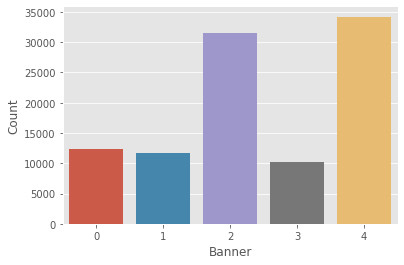

In [17]:
ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner', ylabel='Count')
plt.show()

Thus, we learned how to find the best advertisement banner by framing our problem as a multi-armed bandit problem